In [1]:
import numpy as np
import pandas as pd

# 파이썬에서 통계 분석에 편리한 도구를 제공하는 모듈
# 편리한 통계 분석 도구를 제공하는 패키지
import statsmodels.api as sm
''' R과 관련된 분석 모형들중 
- 검정, 추정 
- 회귀분석 
- 시계열분석
등의 항목을 R스타일로 제공해준다 '''

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# 한글 처리 (코랩에서와 로컬PC(윈,맥,리)와 조금 다름)
import matplotlib as mpl


# 코랩에서만 추가되는 부분
%config InlineBackend.figure_format = 'retina'

# 설치 : 코랩이 운용되는 우분트 리눅스에 설치
# !명령어
!apt -qq -y install fonts-nanum

# 폰트 정보 추출
# 폰트의 실제 위치 : /usr/share/fonts/truetype/nanum/*.ttf
import matplotlib.font_manager as fm
# 실제 파일 > 우클릭 > 경로복사
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties( fname=font_path, size=10 )

# 실제 적용, 실제적으로 실제 폰트가 존재하고, 그 이름을 정확하게 안다면
# 아래 한줄로 처리 가능
plt.rc( 'font', family=font.get_name() )
mpl.font_manager._rebuild()

# 빌트인
%matplotlib inline

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [3]:
# /content/drive/My Drive/Phoenix/PJM/회귀분석데이터/covid_monthly.csv
# /content/drive/My Drive/Phoenix/PJM/회귀분석데이터/covid_new.csv
# /content/drive/My Drive/Phoenix/PJM/회귀분석데이터/covid_weekly.csv
# /content/drive/My Drive/Phoenix/PJM/회귀분석데이터/weekly_sum.csv
#/content/drive/My Drive/Phoenix/PJM/회귀분석데이터/covid_seoul_weekly.csv
path1='/content/drive/My Drive/Phoenix/PJM/회귀분석데이터/covid_seoul_weekly.csv'
covid_seoul_weekly = pd.read_csv(path1)
path = '/content/drive/My Drive/Phoenix/PJM/회귀분석데이터/covid_weekly.csv'
covid_weekly = pd.read_csv(path)

In [4]:
covid_weekly

,Unnamed: 0,confirmers,weeks,growth_rate
0,0,3,1,0.00
1,1,15,2,400.00
2,2,27,3,80.00
3,3,29,4,7.41
4,4,602,5,1975.86
5,5,3736,6,520.60
6,6,7134,7,90.95
7,7,8126,8,13.91
8,8,8897,9,9.49
9,9,9583,10,7.71


In [5]:
covid_seoul_weekly

,Unnamed: 0,confirmed
0,1,0
1,2,5
2,3,14
3,4,14
4,5,31
5,6,87
6,7,120
7,8,247
8,9,324
9,10,410


In [6]:
covid_weekly.drop(columns=['Unnamed: 0'], inplace=True)

In [7]:
covid_weekly['weeks'] = covid_weekly['weeks'].apply(lambda x:f'{x}주차')
covid_seoul_weekly['Unnamed: 0'] = covid_seoul_weekly['Unnamed: 0'].apply(lambda x:f'{x}주차')

In [9]:
covid_seoul_weekly.columns = ['weeks', 'confirmed']

In [10]:
path = '/content/drive/My Drive/Phoenix/PJM/회귀분석데이터/weekly_sum.csv'
weekly_sum = pd.read_csv(path)

In [11]:
weekly_sum.columns = ['weeks','delivery_sum', 'fpop_sum']

In [12]:
weekly_covid_sum=weekly_sum.merge(covid_weekly, how='left',on='weeks')

In [13]:
seoul_weekly_covid_sum=weekly_sum.merge(covid_seoul_weekly, how='left',on='weeks')

# 회귀분석


## 코로나 확진자와 배달건수

In [ ]:
weekly_covid_sum.columns

Index(['weeks', 'delivery_sum', 'fpop_sum', 'confirmers', 'growth_rate'], dtype='object')

In [ ]:
model = sm.OLS( weekly_covid_sum['delivery_sum'], sm.add_constant(weekly_covid_sum['confirmers']))

In [ ]:
result = model.fit()

In [ ]:
print( result.summary())

                            OLS Regression Results                            
Dep. Variable:           delivery_sum   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.055
Method:                 Least Squares   F-statistic:                  0.001737
Date:                Thu, 30 Jul 2020   Prob (F-statistic):              0.967
Time:                        08:00:40   Log-Likelihood:                -184.78
No. Observations:                  20   AIC:                             373.6
Df Residuals:                      18   BIC:                             375.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.331e+04   1119.653     29.746      0.0

In [ ]:
tmp = np.corrcoef( weekly_covid_sum['confirmers'],weekly_covid_sum['delivery_sum'])
# R²
round(np.sum(np.tril(tmp, k=-1)) ** 2, 4)

0.0001

## 코로나 확진자수와 유동인구수

In [ ]:
model = sm.OLS( weekly_covid_sum['fpop_sum'], sm.add_constant(weekly_covid_sum['confirmers']))

In [ ]:
result = model.fit()

In [ ]:
print( result.summary())

                            OLS Regression Results                            
Dep. Variable:               fpop_sum   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                 -0.031
Method:                 Least Squares   F-statistic:                    0.4374
Date:                Thu, 30 Jul 2020   Prob (F-statistic):              0.517
Time:                        08:00:40   Log-Likelihood:                -346.40
No. Observations:                  20   AIC:                             696.8
Df Residuals:                      18   BIC:                             698.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.478e+08   3.62e+06     40.843      0.0

In [ ]:
tmp = np.corrcoef( weekly_covid_sum['confirmers'], weekly_covid_sum['fpop_sum'])
# R²
round(np.sum(np.tril(tmp, k=-1)) ** 2, 4)

0.0237

In [14]:
seoul_weekly_covid_sum.columns

Index(['weeks', 'delivery_sum', 'fpop_sum', 'confirmed'], dtype='object')

In [15]:
tmp = np.corrcoef( seoul_weekly_covid_sum['confirmed'], seoul_weekly_covid_sum['fpop_sum'])
# R²
round(np.sum(np.tril(tmp, k=-1)) ** 2, 4)

0.0322

In [16]:
tmp = np.corrcoef( seoul_weekly_covid_sum['confirmed'], seoul_weekly_covid_sum['delivery_sum'])
# R²
round(np.sum(np.tril(tmp, k=-1)) ** 2, 4)

0.026

In [17]:
seoul_weekly_covid_sum

,weeks,delivery_sum,fpop_sum,confirmed
0,1주차,25883.0,154890314.0,0
1,2주차,33593.0,148214148.0,5
2,3주차,34868.0,150721344.0,14
3,4주차,32977.0,154992833.0,14
4,5주차,35410.0,149608641.0,31
5,6주차,36616.0,133887053.0,87
6,7주차,34651.0,133907165.0,120
7,8주차,36576.0,134325500.0,247
8,9주차,33816.0,136830094.0,324
9,10주차,34146.0,140482117.0,410


## 코로나 확진자수와 온라인쇼핑

In [ ]:
path = '/content/drive/My Drive/Phoenix/PJM/회귀분석데이터/OnlineShopping.csv'
onlineshopping = pd.read_csv(path)

In [ ]:
onlineshopping.columns = ['month', 'sales_sum', 'food_sum']

In [ ]:
onlineshopping_2020=onlineshopping[24:]

In [ ]:
path = '/content/drive/My Drive/Phoenix/PJM/회귀분석데이터/covid_monthly.csv'
covid_month = pd.read_csv(path)

In [ ]:
covid_month

,month,confirmed
0,2020-01,11
1,2020-02,3139
2,2020-03,6635
3,2020-04,979
4,2020-05,703


In [ ]:
covid_online=covid_month.merge(onlineshopping_2020, how='left', on='month')

In [ ]:
covid_online

,month,confirmed,sales_sum,food_sum
0,2020-01,11,12304762,1416443
1,2020-02,3139,11963252,1481513
2,2020-03,6635,12624728,1631491
3,2020-04,979,12055233,1516911
4,2020-05,703,12722071,1475869


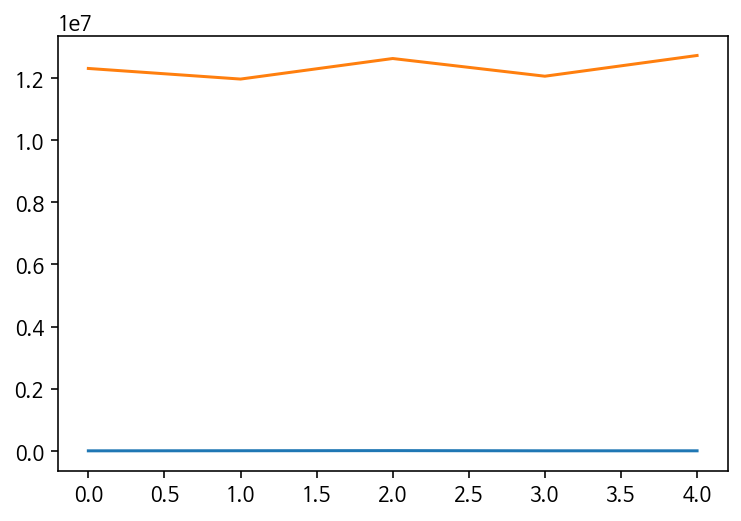

In [ ]:
plt.figure()
plt.plot(covid_online['confirmed'])
plt.plot(covid_online['sales_sum'])
plt.show()

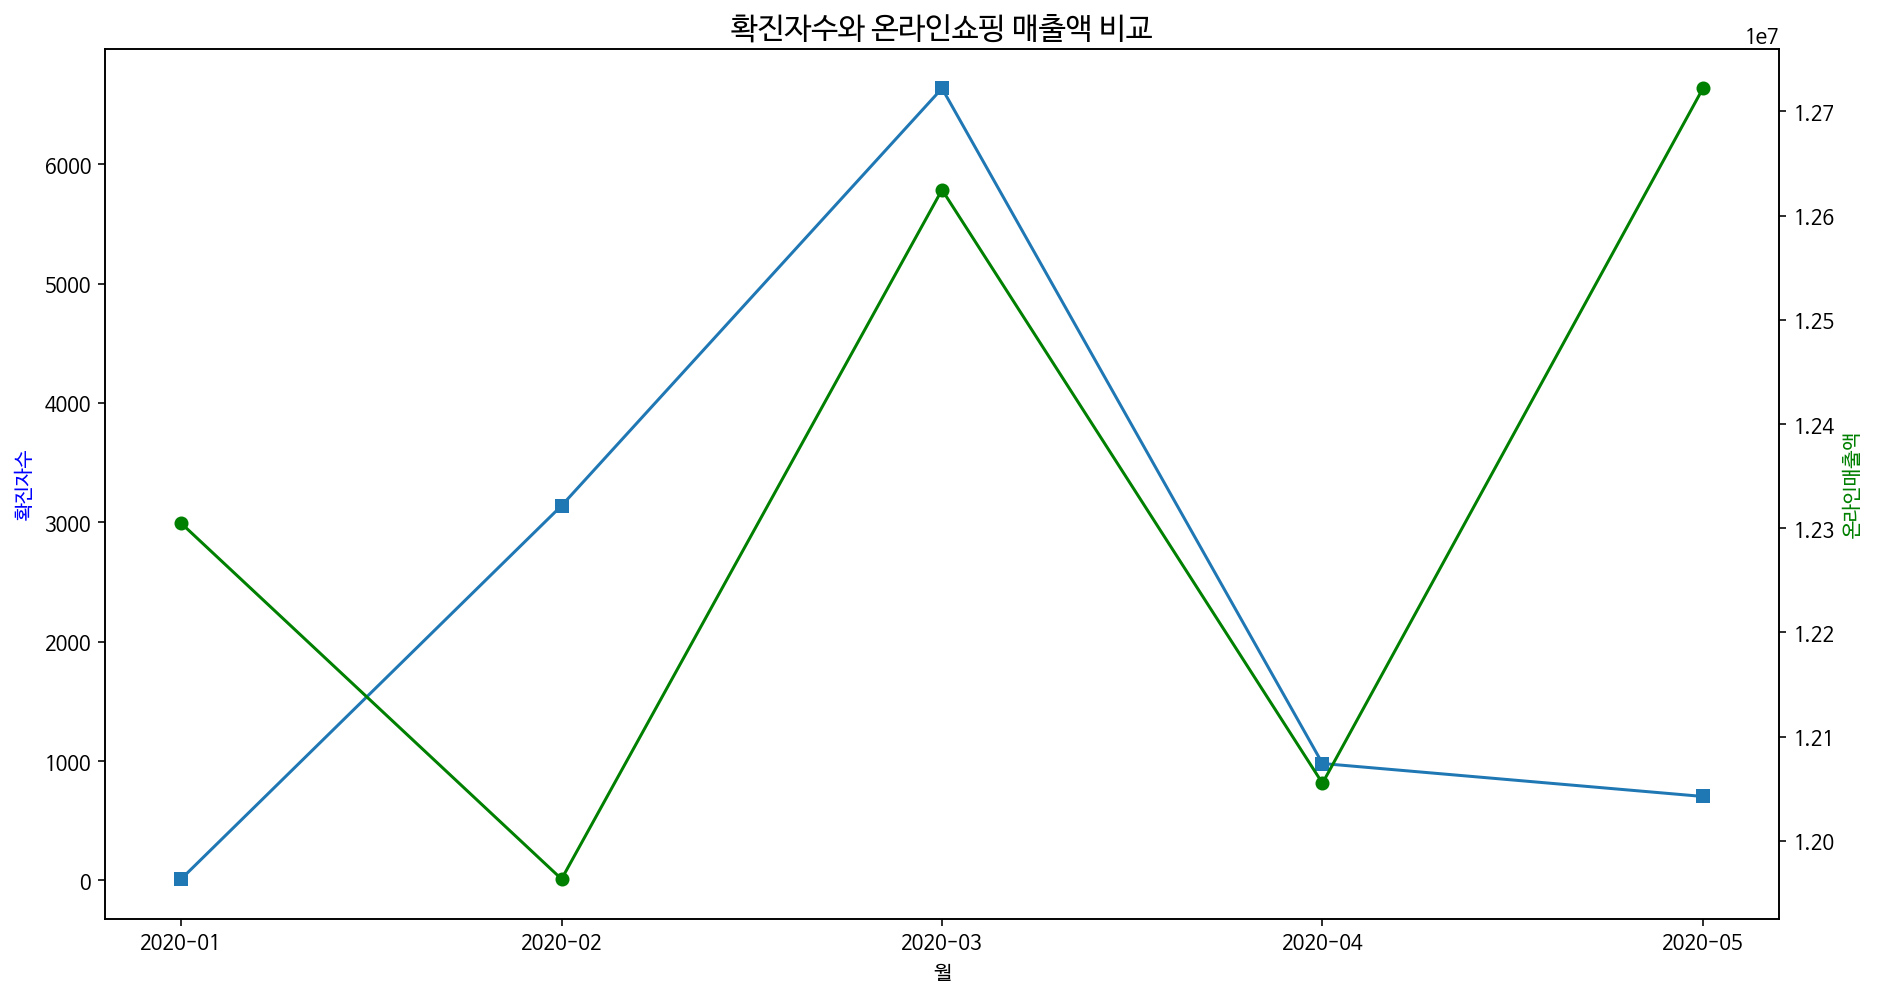

In [ ]:
fg, ax1 = plt.subplots()
fg.set_size_inches(15,8)

ax2 = ax1.twinx()
ax1.plot(covid_online['month'], covid_online['confirmed'], marker='s')
ax2.plot(covid_online['month'], covid_online['sales_sum'], marker='o', color="green" )

ax1.set_xlabel('월')

ax1.set_ylabel('확진자수', color='b')
ax2.set_ylabel('온라인매출액', color='green')



plt.title('확진자수와 온라인쇼핑 매출액 비교', size = 15)

plt.show()

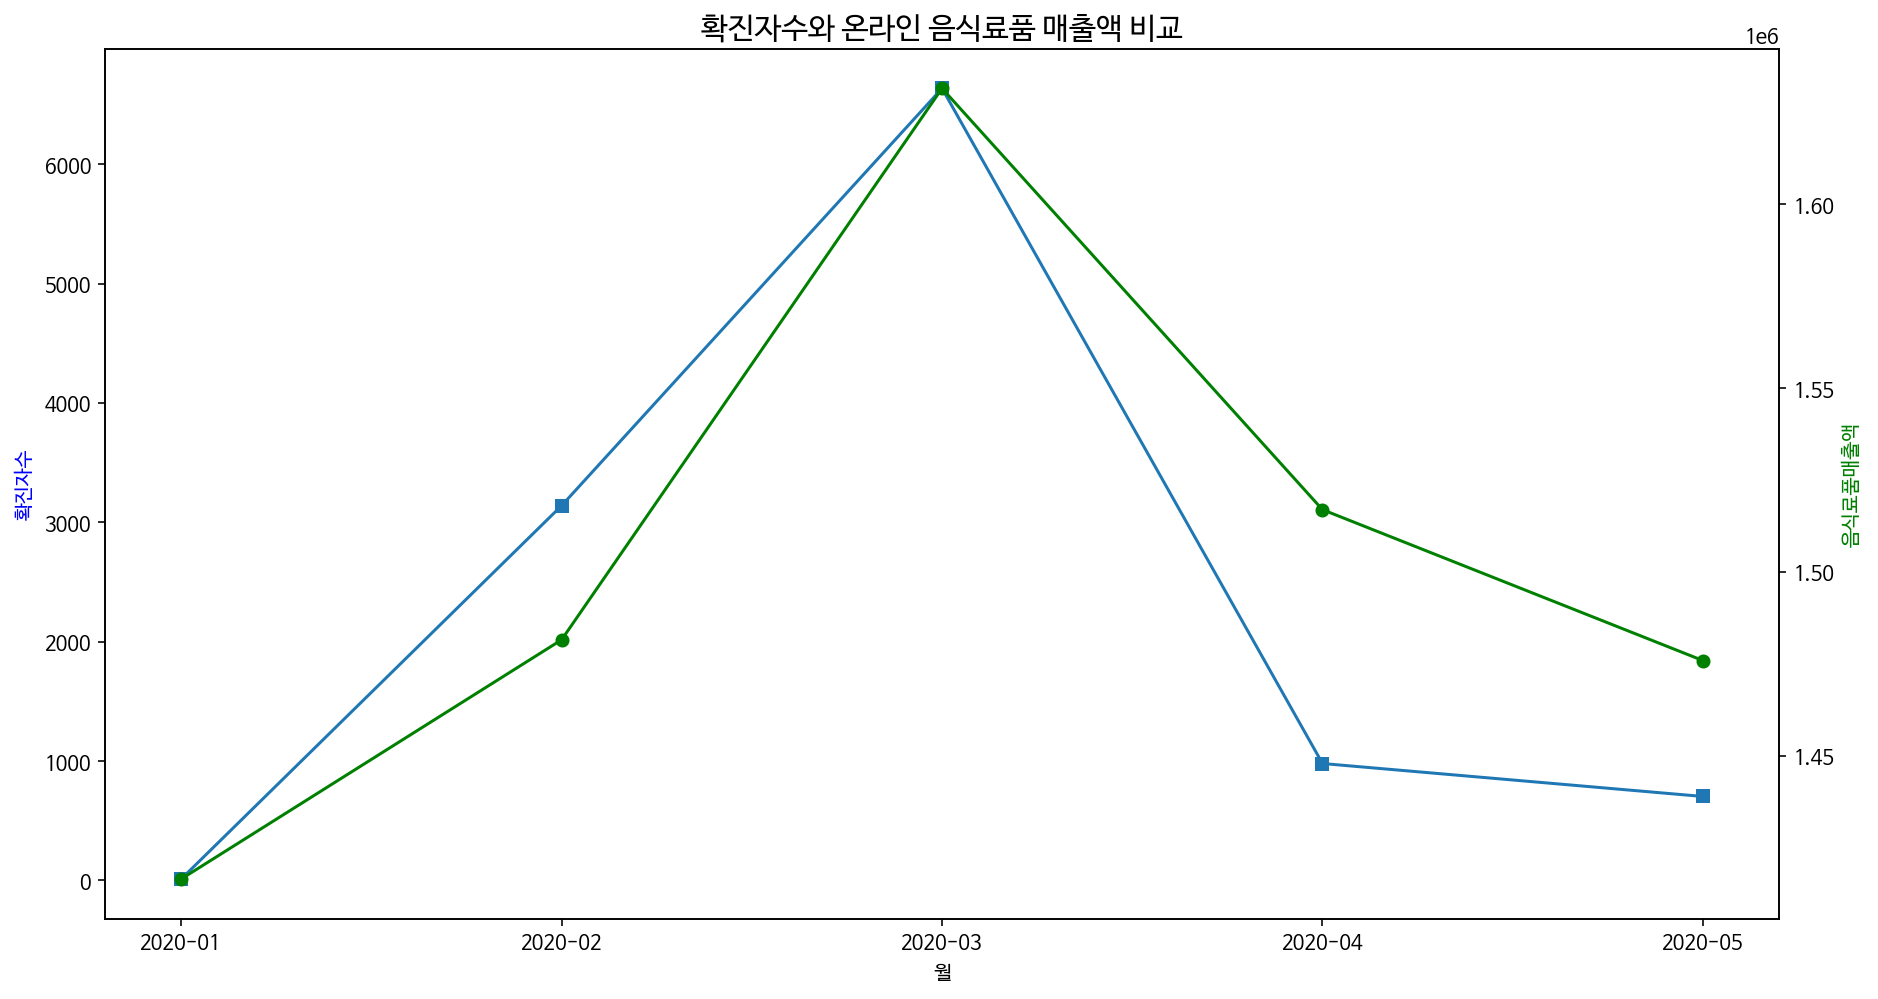

In [ ]:
fg, ax1 = plt.subplots()
fg.set_size_inches(15,8)

ax2 = ax1.twinx()
ax1.plot(covid_online['month'], covid_online['confirmed'], marker='s')
ax2.plot(covid_online['month'], covid_online['food_sum'], marker='o', color="green" )

ax1.set_xlabel('월')

ax1.set_ylabel('확진자수', color='b')
ax2.set_ylabel('음식료품매출액', color='green')



plt.title('확진자수와 온라인 음식료품 매출액 비교', size = 15)

plt.show()

In [ ]:
tmp = np.corrcoef( covid_online['confirmed'], covid_online['food_sum'])
# R²
round(np.sum(np.tril(tmp, k=-1)) ** 2, 4)

0.7882